<a href="https://colab.research.google.com/github/jumafernandez/SIyBD-UNTreF/blob/main/codigo/notebooks/apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reglas de asociación: Algoritmo apriori

En esta notebook, compartimos una notebook con la generación de reglas a través del algoritmo *apriori* para el dataset `Groceries`.


En primer lugar, se cargan las librerías necesarias y el dataset desde el repositorio de *Github*:

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Cargar el dataset desde el archivo CSV descargado de Kaggle
groceries = pd.read_csv('https://raw.githubusercontent.com/jumafernandez/SIyBD-UNTreF/main/data/groceries_dataset.csv')

# Ver las primeras filas para entender el formato del dataset
print(groceries.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


Aplicamos transformaciones en los datos para que nos quede una instancia por transacción y un producto por columna:

In [3]:
# Agrupar los datos por 'Member_number' y 'itemDescription' y transformarlo a formato one-hot encoding
groceries_encoded = groceries.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
groceries_encoded = groceries_encoded.map(lambda x: 1 if x > 0 else 0)

# Verificar el resultado del one-hot encoding
print(groceries_encoded.head())

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                            0               0     0              0   
1001                            0               0     0              0   
1002                            0               0     0              0   
1003                            0               0     0              0   
1004                            0               0     0          

Se generan los itemsets frecuentes y las reglas de asociación con un `soporte=0.01` y una `confianza=0.01`.

In [4]:
# Generar los conjuntos frecuentes con soporte mínimo
frequent_itemsets = apriori(groceries_encoded, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación con soporte y confianza mínimos
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

# Ver la cantidad de reglas generadas
print(f"Número de reglas generadas: {len(rules)}")

# Ver las primeras reglas generadas
print("Reglas generadas:")
print(rules.head())

Número de reglas generadas: 15480
Reglas generadas:
      antecedents      consequents  antecedent support  consequent support  \
0      (UHT-milk)           (beef)            0.078502            0.119548   
1          (beef)       (UHT-milk)            0.119548            0.078502   
2      (UHT-milk)   (bottled beer)            0.078502            0.158799   
3  (bottled beer)       (UHT-milk)            0.158799            0.078502   
4      (UHT-milk)  (bottled water)            0.078502            0.213699   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010518    0.133987  1.120775  0.001133    1.016672       0.116940  
1  0.010518    0.087983  1.120775  0.001133    1.010396       0.122392  
2  0.014879    0.189542  1.193597  0.002413    1.037933       0.176014  
3  0.014879    0.093700  1.193597  0.002413    1.016769       0.192815  
4  0.021293    0.271242  1.269268  0.004517    1.078960       0.230217  


Ordenamos las reglas po el lift y mostramos las primeras 10:

In [5]:
# Ordenar las reglas por lift y mostrar las primeras 10
rules_sorted_by_lift = rules.sort_values(by="lift", ascending=False)
print("Top 10 reglas ordenadas por lift:")
print(rules_sorted_by_lift.head(10))

Top 10 reglas ordenadas por lift:
                                   antecedents  \
15411                     (yogurt, rolls/buns)   
15398  (sausage, whole milk, other vegetables)   
15397   (other vegetables, yogurt, rolls/buns)   
15412                    (sausage, whole milk)   
13017                           (curd, yogurt)   
13012                    (sausage, whole milk)   
15408               (other vegetables, yogurt)   
15401        (sausage, whole milk, rolls/buns)   
15400   (whole milk, other vegetables, yogurt)   
15409                    (sausage, rolls/buns)   

                                   consequents  antecedent support  \
15411  (sausage, whole milk, other vegetables)            0.111339   
15398                     (yogurt, rolls/buns)            0.050282   
15397                    (sausage, whole milk)            0.052335   
15412   (other vegetables, yogurt, rolls/buns)            0.106978   
13017                    (sausage, whole milk)            0.04027

Ahora ordenamos las reglas que del lado izquierdo poseen botella de cerveza (por ejemplo):

In [6]:
# Filtrar reglas con antecedente específico (lhs) - "bottled beer"
rules_beer = rules[rules['antecedents'].apply(lambda x: 'bottled beer' in x)]
print("\nReglas con antecedente 'bottled beer':")
print(rules_beer)


Reglas con antecedente 'bottled beer':
                        antecedents                 consequents  \
3                    (bottled beer)                  (UHT-milk)   
73                   (bottled beer)                      (beef)   
141                  (bottled beer)                   (berries)   
193                  (bottled beer)                 (beverages)   
234                  (bottled beer)             (bottled water)   
...                             ...                         ...   
11331  (soda, yogurt, bottled beer)                (whole milk)   
11334    (whole milk, bottled beer)              (soda, yogurt)   
11336          (soda, bottled beer)        (whole milk, yogurt)   
11337        (bottled beer, yogurt)          (whole milk, soda)   
11341                (bottled beer)  (whole milk, soda, yogurt)   

       antecedent support  consequent support   support  confidence      lift  \
3                0.158799            0.078502  0.014879    0.093700  1.193

O que en el consecuente poseen manteca:

In [7]:
# Filtrar reglas con consecuente específico (rhs) - "butter"
rules_butter = rules[rules['consequents'].apply(lambda x: 'butter' in x)]
print("\nReglas con consecuente 'butter':")
print(rules_butter)


Reglas con consecuente 'butter':
                antecedents                   consequents  antecedent support  \
8                (UHT-milk)                      (butter)            0.078502   
78                   (beef)                      (butter)            0.119548   
146               (berries)                      (butter)            0.079785   
238          (bottled beer)                      (butter)            0.158799   
337         (bottled water)                      (butter)            0.213699   
...                     ...                           ...                 ...   
12342  (whole milk, yogurt)                (soda, butter)            0.150590   
12344        (soda, yogurt)          (whole milk, butter)            0.097486   
12346          (whole milk)        (soda, butter, yogurt)            0.458184   
12347                (soda)  (whole milk, butter, yogurt)            0.313494   
12349              (yogurt)    (whole milk, soda, butter)            0.2829

También buscamos reglas con waffles:

In [8]:
# Filtrar reglas que contienen "waffles" en el antecedente
rules_waffles = rules[rules['antecedents'].apply(lambda x: 'waffles' in x)]
print("\nReglas que contienen 'waffles' en el antecedente:")
print(rules_waffles)


Reglas que contienen 'waffles' en el antecedente:
                       antecedents                        consequents  \
131                      (waffles)                             (beef)   
325                      (waffles)                     (bottled beer)   
433                      (waffles)                    (bottled water)   
511                      (waffles)                      (brown bread)   
731                      (waffles)                      (canned beer)   
829                      (waffles)                          (chicken)   
959                      (waffles)                     (citrus fruit)   
1229                     (waffles)                    (domestic eggs)   
1301                     (waffles)                      (frankfurter)   
1861                     (waffles)                 (other vegetables)   
1912                     (waffles)                           (pastry)   
1957                     (waffles)                        (pip fruit)   


Graficamos el soporte, la confianza y el lift de las reglas generadas:

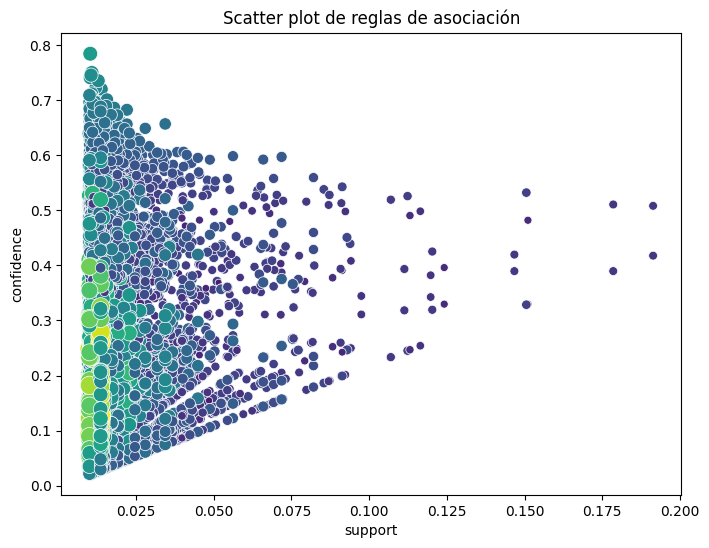

In [9]:
# Gráfico de dispersión entre soporte, confianza y lift
plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, sizes=(10, 200), palette='viridis', legend=False)
plt.title("Scatter plot de reglas de asociación")
plt.show()

Y lo plasmamos de otra forma:

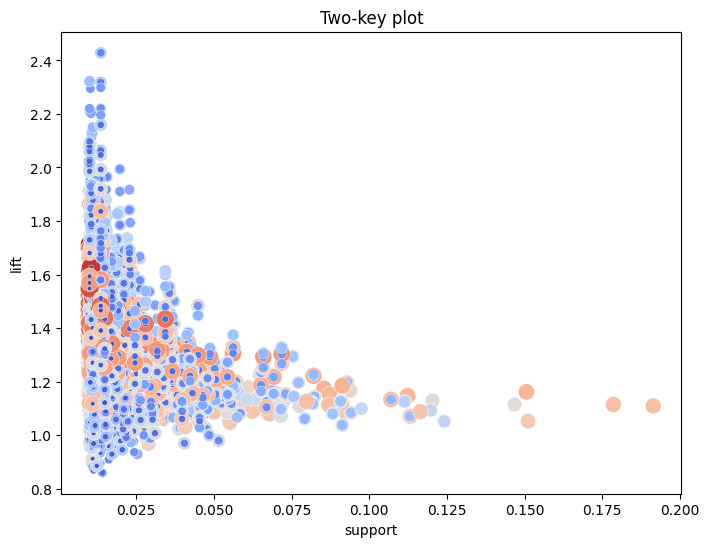

In [10]:
# Gráfico de two-key plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='lift', size='confidence', hue='confidence', data=rules, sizes=(10, 200), palette='coolwarm', legend=False)
plt.title("Two-key plot")
plt.show()